# Data Science Programming Assignment - 2

This Assignment focuses on data preprocessing and model building. Load the "adult" dataset. Predict the "gender" of the individuals using a logistic regression model. Make a stratified 80-20 split based on "relationship" to ensure there are no biases in the dataset. Calculate the accuracy, root mean squared error,confusion matrix, cross validation score, precision, recall, ROC Curve for you model. Provide your intepretations based on these metrics.

Import libraries

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve

In [2]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

Load the dataset

In [3]:
#adult=pd.read_csv("adultmodified.csv")
#adult.head()
adult=pd.read_csv('adult.csv', names=['Age','Employer_Type','fnlwgt','Education_Level','Education_Number','Maratial_Status','Occupation','relationship','Race','Gender','Cap_Gain','Cap_Loss','Hours_per_week','Country','Salary'])
adult.head()

,Age,Employer_Type,fnlwgt,Education_Level,Education_Number,Maratial_Status,Occupation,relationship,Race,Gender,Cap_Gain,Cap_Loss,Hours_per_week,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
y=adult['Gender']
y
X=adult.drop(['Gender'],axis=1)
X.head()

,Age,Employer_Type,fnlwgt,Education_Level,Education_Number,Maratial_Status,Occupation,relationship,Race,Cap_Gain,Cap_Loss,Hours_per_week,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K


Make the train and test split. Use random seed = 42

In [5]:
z=adult['relationship']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=z,random_state=42,
                                                    test_size=0.20)

In the above code I am storing my relationship column of df in z and implementing stratified sampling based on the relationship column which is stored in z

Drop the columns with null values in train and test datasets.

In [7]:
X_train=X_train.dropna(axis=1,inplace=False)
X_test=X_test.dropna(axis=1,inplace=False)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 14525 to 11160
Data columns (total 11 columns):
Age                 6513 non-null int64
fnlwgt              6513 non-null int64
Education_Level     6513 non-null object
Education_Number    6513 non-null int64
Maratial_Status     6513 non-null object
relationship        6513 non-null object
Race                6513 non-null object
Cap_Gain            6513 non-null int64
Cap_Loss            6513 non-null int64
Hours_per_week      6513 non-null int64
Salary              6513 non-null object
dtypes: int64(6), object(5)
memory usage: 610.6+ KB


Define Independent and Target variable (i.e. create train/test datasets appropriately)

In [8]:
# This is already done above

Encode Categorical variables. Use "One hot Encoding"

In [9]:
categorical_features = ['Education_Level','Maratial_Status','relationship','Race','Salary']
categorical_pipeline = Pipeline(steps=[
    ('selector', DataFrameSelector(categorical_features)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Scale Numerical Variables. Use "Standard Scaler".


In [10]:
numeric_features = ['Age','fnlwgt','Education_Number','Cap_Gain','Cap_Loss','Hours_per_week']
numeric_pipeline = Pipeline(steps=[
    ('selector',DataFrameSelector(numeric_features)),
    ('scaler', StandardScaler())])

As I am doing both one hot encoding and standard scalar operations in a pipeline I am not recreating the dataframe and directly proceeding with model building

Recreate the dataframe from your encoded scaled values and build a logistic regression model to predict the "sex/gender".

In [11]:
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[
    ("numeric_pipeline",numeric_pipeline),
    ("categorical_pipeline",categorical_pipeline)])

In [12]:
clf = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', LogisticRegression(solver='lbfgs'))])
#y = adult['Gender']
#X = adult.drop('Gender', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y,test_size=0.2)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test,y_test))

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


model score: 0.798


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Calculate all the metrics noted above in this notebook (accuracy, confusion matrix etc. - see above)

In [13]:
y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1393,  792],
       [ 521, 3807]], dtype=int64)

Based on the above confusion matrix out of all the actual negative values the model is predicting 1393 correctly as negative
Based on the above confusion matrix out of all the actual positive values the model is predicting 3807 correctly as positive
Based on the above confusion matrix out of all the actual positive values the model is predicting 792 incorrectly as negative
Based on the above confusion matrix out of all the actual negative values the model is predicting 521 incorrectly as positive

Note: In the above confusion matrix my positive label is "Male" and negative label is "Female"

In [14]:
accuracy_score(y_test,y_pred)

0.7984031936127745

The accuracy of 0.79 suggests that the model is good at predicting 79 percent of the instances correctly 

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb_style_y_pred = LabelBinarizer()
lb_results_y_pred = lb_style_y_pred.fit_transform(y_pred)
pd.DataFrame(lb_results_y_pred).head()

,0
0,1
1,1
2,1
3,1
4,1


In [16]:
from sklearn.preprocessing import LabelBinarizer
lb_style_y_test = LabelBinarizer()
lb_results_y_test = lb_style_y_pred.fit_transform(y_test)
pd.DataFrame(lb_results_y_test).head()

,0
0,1
1,1
2,1
3,0
4,1


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(lb_results_y_test, lb_results_y_pred))
rms

0.4489953300283039

The root mean squared error of 0.44 depicts that the predicted values differ from the actual value by 0.44 on an average 

In [18]:
precision_score(y_test,y_pred,average="binary", pos_label=" Male")

0.8277886497064579

Precision is same as tp/(tp+fp) in our case 3807/(3807+792) which is equal to 0.827

In [19]:
recall_score(y_test,y_pred,average="binary",pos_label=" Male")

0.8796210720887245

Recall is same as true positive rate i.e., tp/(tp+fn) in our case 3807/(521+3807) which is equal to 0.879

In [20]:
f1_score(y_test,y_pred,average="binary",pos_label=" Male")

0.8529181135879915

In [21]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\Ap

array([0.79845675, 0.81296787, 0.80188897])

In the cross validation we have split the dataset into 2 train bins and 1 test bin and it is repeated for 3 times as cv=3 in our logic and as the values of accuracies around 0.80 sugget that values are standard we can rely on accuracy

In [22]:
y_scores=cross_val_predict(clf,X_train,y_train,cv=3,method="decision_function")

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\udays\Ap

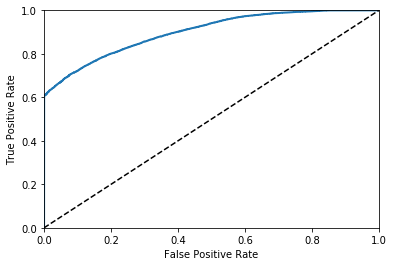

In [23]:
fpr,tpr,thresholds=roc_curve(y_train,y_scores, pos_label=" Male")
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

The reciever operating charecteristic curve we plot tpr vs fpr i.e.,senstivity vs (1-specificity) and an ideal model will have an roc of 1 and in practical cases it is almost impossible and for our model in this case we are getting an roc of 0.6 